In [1]:
from fastai.text import *
#import torch.nn as nn
#import torch.nn.functional as F

In [2]:
#path = untar_data(URLs.IMDB_SAMPLE)
#path.ls()

In [3]:
#data = TextClasDataBunch.from_csv(path, 'texts.csv')
#data.show_batch()

In [4]:
#iter_dl = iter(data.train_dl)
#_ = next(iter_dl)
#x,y = next(iter_dl)
#x[-10:,:20]
#len(x), len(x[0])

In [5]:
# Settings
path = 'data/Amazon_zip'
bs = 48

In [6]:
data_clas = (TextList.from_folder(path)
             .split_by_folder(valid='test')
             #split by train and valid folder (that only keeps 'train' and 'test' so no need to filter)
             .label_from_folder()
             #label them all with their folders
             .databunch(bs=bs, num_workers=0))

In [7]:
# Random seed
def random_seed(seed_value, use_cuda):
    np.random.seed(seed_value) # cpu vars
    torch.manual_seed(seed_value) # cpu  vars
    random.seed(seed_value) # Python
    if use_cuda: 
        torch.cuda.manual_seed(seed_value)
        torch.cuda.manual_seed_all(seed_value) # gpu vars
        torch.backends.cudnn.deterministic = True  #needed
        torch.backends.cudnn.benchmark = False
#Remember to use num_workers=0 when creating the DataBunch.

In [8]:
# Remove dropout
config = awd_lstm_clas_config.copy()
config['hidden_p'] = 0
config['input_p'] = 0
config['embed_p'] = 0
config['weight_p'] = 0

In [9]:
learn = text_classifier_learner(data_clas, AWD_LSTM, config=config, drop_mult=0, pretrained = False)

In [10]:
random_seed(42, True)
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


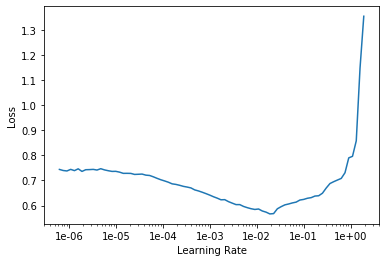

In [11]:
learn.recorder.plot()

In [12]:
random_seed(42, True)
learn.fit_one_cycle(5, 1.5e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.556457,0.691567,0.503125,00:29
1,0.665550,0.712632,0.493750,00:27
2,0.691752,0.700210,0.490625,00:31
3,0.695328,0.700851,0.500000,00:29
4,0.694879,0.699275,0.490625,00:30


In [14]:
learn.save('simple_rnn_1')

In [19]:
learn.load('simple_rnn_1');

In [ ]:
learn.unfreeze()

random_seed(42, True)
learn.fit_one_cycle(5, 1.5e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.697994,0.769409,0.500000,00:29
1,0.703887,0.706415,0.490625,00:27
2,0.704906,2.401134,0.500000,00:31
3,0.701287,1.706626,0.500000,00:29
